In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dropout 
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import regularizers
from keras import optimizers
from keras.datasets import cifar10

%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Train validation sets split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [ ]:
# Data augmentation - Whiten + Random shifts + Random flips

ImageGenerator = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    zca_whitening=True,
    rotation_range = 20,
    width_shift_range = 2,
    height_shift_range = 2,
    horizontal_flip = True,
    vertical_flip = True
)

ImageGenerator.fit(x_train)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:836: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
## Normalization 
mean = np.mean(x_train, axis = (0, 1, 2, 3))
std = np.std(x_train, axis = (0, 1, 2, 3))
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std
x_valid = (x_valid - mean)/std

In [ ]:
# CNN model

num_filters = 32
num_classes = len(np.unique(y_train))

model = Sequential()
model.add(Conv2D(num_filters, (3, 3), padding = 'same', 
                 input_shape = (32, 32, 3))) # conv_1
model.add(Activation('relu')) # relu_1
model.add(Conv2D(num_filters, (3, 3), padding = 'same')) # conv_2
model.add(Activation('relu')) # relu_2
model.add(Dropout(0.3)) # dropout_1
model.add(MaxPooling2D(pool_size = (2, 2))) # pooling_1

model.add(Conv2D(2*num_filters, (3, 3), padding = 'same')) # conv_3
model.add(Activation('relu')) # relu_3
model.add(Conv2D(2*num_filters, (3, 3), padding = 'same')) # conv_4
model.add(Activation('relu')) # relu_4
model.add(Dropout(0.3)) # dropout_2
model.add(MaxPooling2D(pool_size = (2, 2))) # pooling_2

model.add(Flatten()) # FC
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [ ]:
# One hot encoding 
print(x_train.shape, x_test.shape,x_valid.shape)

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_valid= np_utils.to_categorical(y_valid, num_classes)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# Train the model

start = time.time()
fit = model.fit(x_train, y_train,
                batch_size = 500, 
                epochs = 20,
                validation_data = (x_valid,y_valid))
end = time.time()
print("Training time: %0.2f seconds!"%(end - start))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 519s 13ms/step - loss: 1.7240 - acc: 0.3862 - val_loss: 1.5287 - val_acc: 0.4946
Epoch 2/20
40000/40000 [==============================] - 523s 13ms/step - loss: 1.3047 - acc: 0.5378 - val_loss: 1.3216 - val_acc: 0.5793
Epoch 3/20
40000/40000 [==============================] - 525s 13ms/step - loss: 1.1261 - acc: 0.6064 - val_loss: 1.1897 - val_acc: 0.6256
Epoch 4/20
40000/40000 [==============================] - 528s 13ms/step - loss: 1.0020 - acc: 0.6512 - val_loss: 1.0981 - val_acc: 0.6605
Epoch 5/20
40000/40000 [==============================] - 539s 13ms/step - loss: 0.9154 - acc: 0.6818 - val_loss: 1.0156 - val_acc: 0.6732
Epoch 6/20
40000/40000 [==============================] - 531s 13ms/step - loss: 0.8393 - acc: 0.7067 - val_loss: 0.9543 - val_acc: 0.6937
Epoch 7/20
40000/40000 [==============================] - 522s 13ms/step - loss: 0.7907 - acc: 0.7263 - val_loss: 0.

In [ ]:
evalu_improve = model.evaluate(x_test, y_test, batch_size=500, verbose=1)
print('\nAccuracy of improvement model: %.2f , Loss: %.3f' % (100*evalu_improve[1], evalu_improve[0]))

10000/10000 [==============================] - 32s 3ms/step

Accuracy of improvement model: 75.37 , Loss: 0.721


Text(0.5,1,'Confusion Matrix')

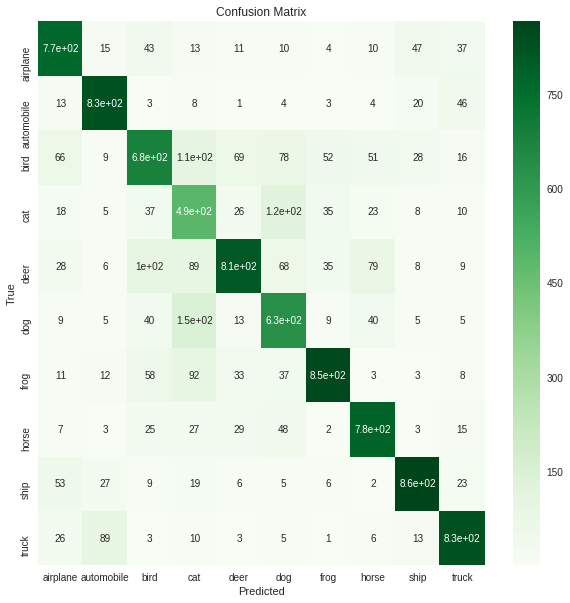

In [ ]:
ytrue = np.where(y_test == 1)[1]
yprob = model.predict(x_test) 
ypredict = yprob.argmax(axis=-1)

confusion_mat = confusion_matrix(ypredict, ytrue)
df_confusion_mat = pd.DataFrame(confusion_mat,index=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"],columns=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])

plt.figure(figsize = (10,10))
sns.heatmap(df_confusion_mat, xticklabels=True, yticklabels=True,cmap="Greens",annot=True)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
  

In [ ]:
target_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(classification_report(ytrue, ypredict, target_names=target_names))
              

              precision    recall  f1-score   support

    airplane       0.80      0.77      0.79      1000
  automobile       0.89      0.83      0.86      1000
        bird       0.59      0.68      0.63      1000
         cat       0.64      0.49      0.55      1000
        deer       0.66      0.81      0.72      1000
         dog       0.70      0.63      0.66      1000
        frog       0.77      0.85      0.81      1000
       horse       0.83      0.78      0.81      1000
        ship       0.85      0.86      0.86      1000
       truck       0.84      0.83      0.84      1000

   micro avg       0.75      0.75      0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



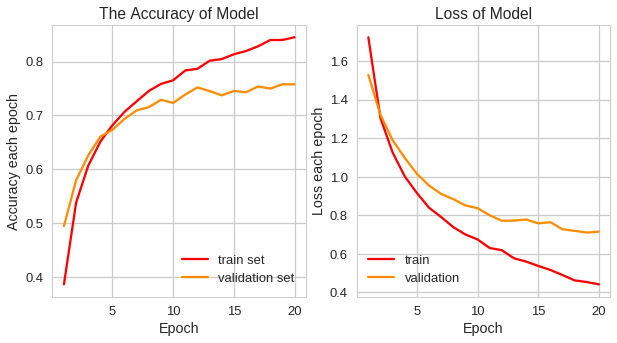

In [ ]:
%matplotlib inline

# Plot the accuracy of Model
def model_accuracy_cost(track):
  
    sns.set_context("talk")
    sns.set_style("whitegrid")
    
    fig, axs = plt.subplots(1, 2,figsize=(10, 5))
    # The plot of accuracy
    axs[0].plot(range(1,21),track.history['acc'],color='red')
    axs[0].plot(range(1,21),track.history['val_acc'],color='darkorange')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy each epoch')
    axs[0].set_title('The Accuracy of Model')
    axs[0].legend(['train set', 'validation set'], loc=4)
    
    # The plot of loss 
    axs[1].plot(range(1,21),track.history['loss'],color='red')
    axs[1].plot(range(1,21),track.history['val_loss'],color='darkorange')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss each epoch')
    axs[1].set_xlabel('Epoch')
    axs[1].set_title('Loss of Model')
    axs[1].legend(['train', 'validation'], loc=3)
    
    plt.show()
    
# Plot show
model_accuracy_cost(fit)
